In [1]:
import os

# I saved all PDF files under the PDF folder in my env directory
pdf_docs_path = os.path.join("PDF")
one_pdf_path = os.path.join(pdf_docs_path,"protect-your-home-from-snow-ice-storms.pdf")


In [2]:
# Trying a better result with pdftotext
import pdftotext

with open(one_pdf_path, "rb") as f:
    pdf = pdftotext.PDF(f)
    
print("This file has", len(pdf), "pages.")

This file has 16 pages.


In [3]:
import nltk
from nltk.tokenize import sent_tokenize

sent = sent_tokenize(pdf[2])
sent[1]

'For homeowners, in particular, cold temperatures, heavy snowfall\nand ice build-ups represent potentially significant sources of property\ndamage.'

In [4]:
# PDFtoText is much better than PyPDF, with automatic ligature conversion!
# Now we can get rid of new lines and stray spaces

import re
cleanerPDF = re.sub('\s+', ' ', pdf[2]).strip()


In [5]:
# Now we could try and assemble one string
for page in pdf:
    print (re.sub('\s+', ' ', page).strip())

Protect your home from Snow & ice storms Designed for safer living ® is a program endorsed by Canada’s insurers to promote disaster-resilient homes.
for Catastrophic Loss Reduction The Institute for Catastrophic Loss Reduction (ICLR), established in 1997, is a world-class centre for multidisciplinary disaster prevention research and communication. ICLR is an independent, not-for-profit research institute founded by the insurance industry and affiliated with the University of Western Ontario. The Institute’s mission is to reduce the loss of life and property caused by severe weather and earthquakes through the identification and support of sustained actions that improve society’s capacity to adapt to, anticipate, mitigate, withstand and recover from natural disasters. ICLR’s mandate is to confront the alarming increase in disaster losses caused by natural disasters and to work to reduce disaster deaths, injuries and property damage. Disaster damage has been doubling every five to seven 

In [6]:
docText = ""
for page in pdf:
    docText = docText + re.sub('\s+', ' ', page).strip()

In [7]:
import nltk
from nltk.probability import FreqDist

tokens = nltk.tokenize.word_tokenize(docText)
fdist=FreqDist(tokens)

In [8]:
fdist

FreqDist({'.': 168, 'the': 139, ',': 115, 'to': 112, 'your': 75, 'and': 75, 'of': 75, 'a': 64, 'can': 64, 'roof': 58, ...})

In [9]:
# Stop words need to be filtered out, otherwise we get the stupid result above.
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))

In [10]:
filtered_tokens=[]
for w in tokens:
    if w not in stop_words:
        filtered_tokens.append(w)
fdist=FreqDist(filtered_tokens)

In [11]:
fdist

FreqDist({'.': 168, ',': 115, 'roof': 58, 'ice': 42, 'home': 34, '!': 31, 'snow': 30, 'water': 26, 'weather': 24, 'damage': 24, ...})

In [12]:
temp = list(stop_words)

In [13]:
temp.append(".")
temp.append(",")
temp.append("The")
temp.append("’")
temp.append("(")
temp.append(")")
temp.append("–")
stop_words = tuple(temp)

In [21]:
filtered_tokens=[]
for w in tokens:
    if w not in stop_words:
        filtered_tokens.append(w)
fdist=FreqDist(filtered_tokens)
fdist

FreqDist({'roof': 58, 'ice': 42, 'home': 34, '!': 31, 'snow': 30, 'water': 26, 'weather': 24, 'damage': 24, 'winter': 22, 'pipes': 22, ...})

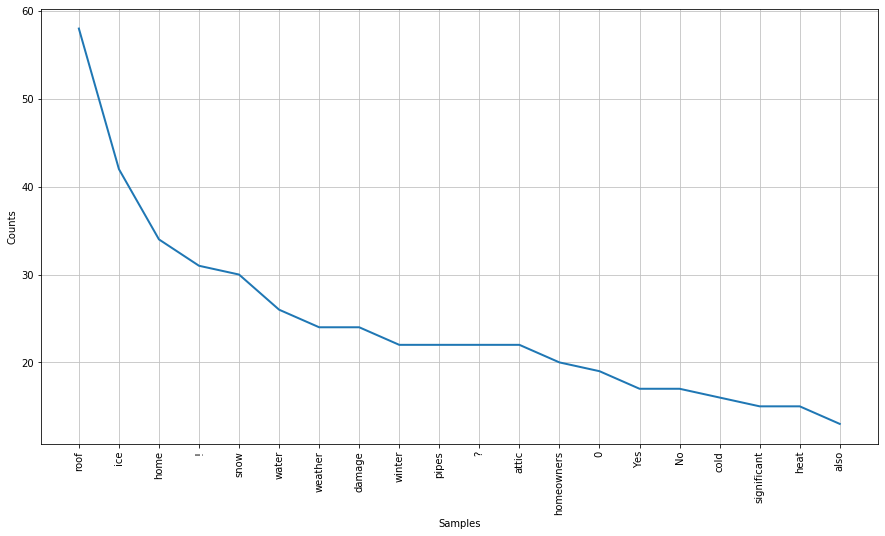

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))

fdist.plot(20,cumulative=False)
plt.show()

In [16]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

docSent = sent_tokenize(docText)
text=word_tokenize(docSent[43])
print(docSent[43])
nltk.pos_tag(text)

2 Talk to your insurance agent or broker It is critical that homeowners talk to insurance agents and brokers to understand what types of damage is covered under their policy.


[('2', 'CD'),
 ('Talk', 'NN'),
 ('to', 'TO'),
 ('your', 'PRP$'),
 ('insurance', 'NN'),
 ('agent', 'NN'),
 ('or', 'CC'),
 ('broker', 'NN'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('critical', 'JJ'),
 ('that', 'IN'),
 ('homeowners', 'NNS'),
 ('talk', 'VBP'),
 ('to', 'TO'),
 ('insurance', 'NN'),
 ('agents', 'NNS'),
 ('and', 'CC'),
 ('brokers', 'NNS'),
 ('to', 'TO'),
 ('understand', 'VB'),
 ('what', 'WP'),
 ('types', 'NNS'),
 ('of', 'IN'),
 ('damage', 'NN'),
 ('is', 'VBZ'),
 ('covered', 'VBN'),
 ('under', 'IN'),
 ('their', 'PRP$'),
 ('policy', 'NN'),
 ('.', '.')]

In [17]:
import nltk
from nltk.tokenize import word_tokenize
nltk.pos_tag(text)

[('2', 'CD'),
 ('Talk', 'NN'),
 ('to', 'TO'),
 ('your', 'PRP$'),
 ('insurance', 'NN'),
 ('agent', 'NN'),
 ('or', 'CC'),
 ('broker', 'NN'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('critical', 'JJ'),
 ('that', 'IN'),
 ('homeowners', 'NNS'),
 ('talk', 'VBP'),
 ('to', 'TO'),
 ('insurance', 'NN'),
 ('agents', 'NNS'),
 ('and', 'CC'),
 ('brokers', 'NNS'),
 ('to', 'TO'),
 ('understand', 'VB'),
 ('what', 'WP'),
 ('types', 'NNS'),
 ('of', 'IN'),
 ('damage', 'NN'),
 ('is', 'VBZ'),
 ('covered', 'VBN'),
 ('under', 'IN'),
 ('their', 'PRP$'),
 ('policy', 'NN'),
 ('.', '.')]

In [18]:
import nltk
from nltk.tokenize import word_tokenize

test_sentence = "Paying attention to local weather forecasts that predict extreme cold weather."
text_test = word_tokenize(test_sentence)
extractPOS = nltk.pos_tag(text_test)
print(extractPOS)

[('Paying', 'VBG'), ('attention', 'NN'), ('to', 'TO'), ('local', 'JJ'), ('weather', 'NN'), ('forecasts', 'NNS'), ('that', 'WDT'), ('predict', 'VBP'), ('extreme', 'JJ'), ('cold', 'NN'), ('weather', 'NN'), ('.', '.')]


In [19]:
import nltk
from nltk.tokenize import word_tokenize

for sentence in docSent:
    text = word_tokenize(sentence)
    extractPOS = nltk.pos_tag(text)
    # Verb, base or gerund tense
    if extractPOS[0][1] == 'VB' or extractPOS[0][1] == 'VBG':
        print(sentence)
        print()

Protect your home from Snow & ice storms Designed for safer living ® is a program endorsed by Canada’s insurers to promote disaster-resilient homes.for Catastrophic Loss Reduction The Institute for Catastrophic Loss Reduction (ICLR), established in 1997, is a world-class centre for multidisciplinary disaster prevention research and communication.

Contacting your municipality is one way to find a good home inspector with knowledge on your area.

Protecting Your Home Full or partial roof collapse, ice dams and frozen pipes are the major threats that homeowner’s should be aware of during periods of extreme winter weather.

According to most builders, a “4 on 12” roof with a slope that is greater than 10cm (vertically) in Roof collapse can be a stressful and expensive 30cm (horizontally) will experience for homeowners.. shed most snow and ice.

Removing ice build-up represents a more significant challenge for homeowners.

Removing Ice on Roofs.

Installing heating cables can be difficult 